In [0]:
import glob
import pandas as pd
from pandas import DataFrame as df
from PIL import Image
import PIL.Image as pilimg
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#결과 csv 파일 읽기
df = pd.read_csv('/content/merge_data.csv')
df.head()

,f_name,Unnamed: 0_x,object1,a1,x1,y1,w1,h1,s1,Unnamed: 0_y,object2,a2,x2,y2,w2,h2,s2,prop,angle
0,insta_lottetower001.jpg,0,lotte_tower,65,413,128,158,619,97802,2,person,99,726,564,245,757,185465,0.527334,54.780180
1,insta_lottetower002.jpg,1,lotte_tower,63,412,61,232,622,144304,3,person,99,438,612,307,459,140913,1.024064,82.297470
2,insta_lottetower005.jpg,2,lotte_tower,74,458,340,184,607,111688,10,person,100,703,742,184,579,106536,1.048359,57.729912
3,insta_lottetower006.jpg,3,lotte_tower,92,321,5,233,886,206438,12,person,99,509,710,279,642,179118,1.152525,70.103741
4,insta_lottetower010.jpg,4,lotte_tower,53,451,73,156,733,114348,39,person,100,63,654,252,682,171864,0.665340,-58.530817


In [0]:
#거리, 각 column 추가
a = df['x1']+df['w1']/2
b = df['y1']+df['h1']/2
c = df['x2']+df['w2']/2
d = df['y2']+df['h2']/2

df['prop'] = df['s1']/df['s2']
df['angle']= np.degrees(np.arctan((b-d)/(a-c)))


In [0]:
#각 범위 0-180도 설정
def angle_func(df):
  if df['angle']<0:
    return df['angle']+180
  else:
    return df['angle']

df['angle'] = df.apply(angle_func, axis=1)
df.head()

,f_name,Unnamed: 0_x,object1,a1,x1,y1,w1,h1,s1,Unnamed: 0_y,object2,a2,x2,y2,w2,h2,s2,prop,angle
0,insta_lottetower001.jpg,0,lotte_tower,65,413,128,158,619,97802,2,person,99,726,564,245,757,185465,0.527334,54.780180
1,insta_lottetower002.jpg,1,lotte_tower,63,412,61,232,622,144304,3,person,99,438,612,307,459,140913,1.024064,82.297470
2,insta_lottetower005.jpg,2,lotte_tower,74,458,340,184,607,111688,10,person,100,703,742,184,579,106536,1.048359,57.729912
3,insta_lottetower006.jpg,3,lotte_tower,92,321,5,233,886,206438,12,person,99,509,710,279,642,179118,1.152525,70.103741
4,insta_lottetower010.jpg,4,lotte_tower,53,451,73,156,733,114348,39,person,100,63,654,252,682,171864,0.665340,121.469183


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
df.head()

,f_name,Unnamed: 0_x,object1,a1,x1,y1,w1,h1,s1,Unnamed: 0_y,object2,a2,x2,y2,w2,h2,s2,prop,angle
0,insta_lottetower001.jpg,0,lotte_tower,65,413,128,158,619,97802,2,person,99,726,564,245,757,185465,0.527334,54.780180
1,insta_lottetower002.jpg,1,lotte_tower,63,412,61,232,622,144304,3,person,99,438,612,307,459,140913,1.024064,82.297470
2,insta_lottetower005.jpg,2,lotte_tower,74,458,340,184,607,111688,10,person,100,703,742,184,579,106536,1.048359,57.729912
3,insta_lottetower006.jpg,3,lotte_tower,92,321,5,233,886,206438,12,person,99,509,710,279,642,179118,1.152525,70.103741
4,insta_lottetower010.jpg,4,lotte_tower,53,451,73,156,733,114348,39,person,100,63,654,252,682,171864,0.665340,121.469183


In [0]:
df1 = df[df['object1']=='lotte_tower']
df2 = df[df['object1']=='merry_go_round']
df3 = df[df['object1']=='namsantower']
df4 = df[df['object1']=='Myeongdong_Cathedral']
df5 = df[df['object1']=='Lotte_Castle']

df4.tail()


,f_name,Unnamed: 0_x,object1,a1,x1,y1,w1,h1,s1,Unnamed: 0_y,object2,a2,x2,y2,w2,h2,s2,prop,angle
853,insta_myeongdongcathedral984.jpg,1246,Myeongdong_Cathedral,55,440,379,150,382,57300,13637,person,90,906,912,78,145,11310,5.066313,43.948508
854,insta_myeongdongcathedral996.jpg,1252,Myeongdong_Cathedral,99,396,-20,202,682,137764,13667,person,100,516,673,132,268,35376,3.894279,80.079474
855,insta_myeongdongcathedral997.jpg,1253,Myeongdong_Cathedral,83,460,93,183,427,78141,13683,person,61,577,643,151,339,51189,1.526519,78.711845
881,insta_namsantower378.jpg,1331,Myeongdong_Cathedral,26,-322,-157,1553,1238,1922614,14910,person,99,9,1080,123,262,32226,59.660336,117.143469
892,insta_namsantower554.jpg,1360,Myeongdong_Cathedral,27,50,7,970,679,658630,15490,person,98,647,100,154,608,93632,7.034240,16.921481


In [0]:
df1.to_csv('lotte_tower.csv', index = False)

In [0]:
df4.head()

,f_name,Unnamed: 0_x,object1,a1,x1,y1,w1,h1,s1,Unnamed: 0_y,object2,a2,x2,y2,w2,h2,s2,prop,angle
303,insta_lotteworld1023.jpg,442,Myeongdong_Cathedral,34,-57,-25,882,948,836136,4589,person,100,-29,470,496,420,208320,4.013710,125.537678
353,insta_lotteworld285.jpg,505,Myeongdong_Cathedral,29,-2,45,739,858,634062,5546,person,100,39,35,673,876,589548,1.075505,172.874984
366,insta_lotteworld342.jpg,521,Myeongdong_Cathedral,35,-165,-138,1258,1168,1469344,5811,person,99,557,494,332,583,193556,7.591312,52.660475
444,insta_lotteworld571.jpg,615,Myeongdong_Cathedral,93,24,-2,1006,1064,1070384,6975,person,95,361,135,383,852,326316,3.280207,50.559947
461,insta_lotteworld629.jpg,640,Myeongdong_Cathedral,33,-74,1,1185,806,955110,7239,person,97,295,84,491,510,250410,3.814185,108.698983


In [0]:
df4.to_csv('myeongdong_cathedral.csv',index=False)

In [0]:
def modeling(model, test_df):
  prediction = model.predict(test_df)
  print("predict :" + str(prediction))

In [0]:
def clustering(df, num, k, modelling, test_df):
    data_points = df.iloc[:,17:19].values
    test_data_point = test_df.iloc[:,17:19].values
    #kmeans = DBSCAN(eps=0.1, min_samples=5).fit(data_points)
    model = KMeans(n_clusters=k, random_state=0)
    kmeans = model.fit(data_points)
    kmeans.labels_
    df['cluster_id'] = kmeans.labels_
    df.to_csv(str(num) + '_cluster_decision.csv', index=False)
    sns.lmplot(x='angle', y='prop', data=df, fit_reg = False,
           scatter_kws={"s":150},
           hue="cluster_id")
    plt.title(str(num) + '_kmeans plot')
    if (modelling):
      modeling(model, test_dfpoint)


In [0]:
from scipy.spatial.distance import cdist

def optimal_k(df, num):
  distortions = []
  K = range(1,10)
  Z = df.iloc[:,17:19].values
  for k in K:
      kmeanModel = KMeans(n_clusters=k).fit(Z)
      kmeanModel.fit(Z)
      distortions.append(sum(np.min(cdist(Z, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Z.shape[0])
  # Plot the elbow
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title(str(num) + ': The optimal k')
  plt.show()

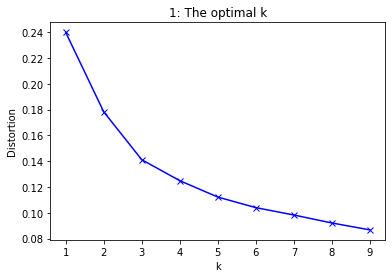

In [0]:
optimal_k(df1,1)

In [0]:
#너무 큰 비율->잘못된 detection이므로 제거
idx_nm = df1[df1['prop']>2].index
df1 = df1.drop(idx_nm)
df1.head()

,f_name,Unnamed: 0_x,object1,a1,x1,y1,w1,h1,s1,Unnamed: 0_y,object2,a2,x2,y2,w2,h2,s2,prop,angle
0,insta_lottetower001.jpg,0,lotte_tower,65,413,128,158,619,97802,2,person,99,726,564,245,757,185465,0.527334,54.780180
1,insta_lottetower002.jpg,1,lotte_tower,63,412,61,232,622,144304,3,person,99,438,612,307,459,140913,1.024064,82.297470
2,insta_lottetower005.jpg,2,lotte_tower,74,458,340,184,607,111688,10,person,100,703,742,184,579,106536,1.048359,57.729912
3,insta_lottetower006.jpg,3,lotte_tower,92,321,5,233,886,206438,12,person,99,509,710,279,642,179118,1.152525,70.103741
4,insta_lottetower010.jpg,4,lotte_tower,53,451,73,156,733,114348,39,person,100,63,654,252,682,171864,0.665340,121.469183


In [0]:
df1['prop'] = (df1['prop']-df1['prop'].mean())/(df1['prop'].max()-df1['prop'].min())
df1['angle'] = (df1['angle']-df1['angle'].mean())/(df1['angle'].max()-df1['angle'].min())

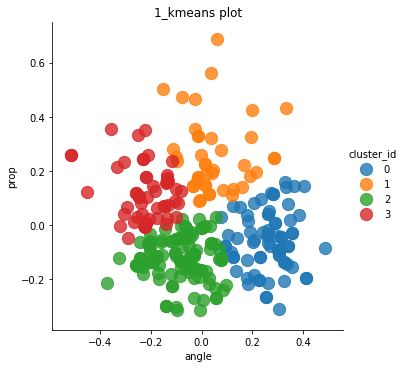

In [0]:
prop = 0.2
angle = 0
data = {'prop' : [prop] ,'angle' : [angle]}
test_df = pd.DataFrame(data, index=None) 
clustering(df1,1,4, False, test_df)

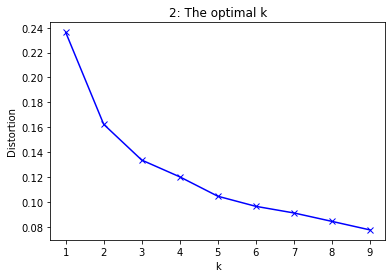

In [0]:
optimal_k(df2,2)

In [0]:
#너무 큰 비율->잘못된 detection이므로 제거
idx_nm = df2[df2['prop']>15].index
df2 = df2.drop(idx_nm)
df2.head()

,f_name,Unnamed: 0_x,object1,a1,x1,y1,w1,h1,s1,Unnamed: 0_y,object2,a2,x2,y2,w2,h2,s2,prop,angle,cluster_id
272,insta_lotteworld005.jpg,404,merry_go_round,99,44,87,999,963,962037,3996,person,99,476,481,249,802,199698,4.817459,79.695154,0
282,insta_lotteworld055.jpg,415,merry_go_round,99,-23,290,1135,343,389305,4208,person,30,82,559,918,126,115668,3.365710,91.249243,0
283,insta_lotteworld057.jpg,416,merry_go_round,89,6,124,753,294,221382,4231,person,96,339,274,172,467,80324,2.756113,79.812453,0
285,insta_lotteworld061.jpg,418,merry_go_round,99,65,21,974,892,868808,4245,person,97,538,524,143,494,70642,12.298746,79.289336,0
292,insta_lotteworld1000.jpg,429,merry_go_round,73,-9,31,1090,738,804420,4456,person,99,411,464,272,349,94928,8.474001,87.359299,0


In [0]:
df2['prop'] = (df2['prop']-df2['prop'].mean())/(df2['prop'].max()-df2['prop'].min())
df2['angle'] = (df2['angle']-df2['angle'].mean())/(df2['angle'].max()-df2['angle'].min())

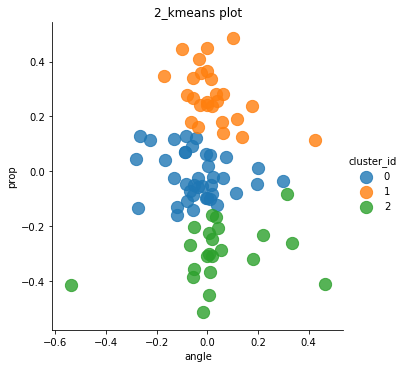

In [0]:
clustering(df2,2,3)

In [0]:
df3 = pd.read_csv('/content/namsantower_df.csv')
df3

,f_name,Unnamed: 0_x,object1,a1,x1,y1,w1,h1,s1,Unnamed: 0_y,object2,a2,x2,y2,w2,h2,s2,prop,angle
0,insta_lottetower410.jpg,199,namsantower,40,-175,-4,1268,1371,1738428,1917,person,92,422,682,170,375,63750,27.269459,75.677280
1,insta_lotteworld214.jpg,485,namsantower,45,0,49,1086,996,1081656,5259,person,100,283,225,857,854,731878,1.477918,31.928907
2,insta_lotteworld304.jpg,513,namsantower,29,-33,-74,1108,1472,1630976,5665,person,100,-3,129,1051,1221,1283271,1.270952,88.891188
3,insta_lotteworld347.jpg,525,namsantower,51,26,65,973,1176,1144248,5842,person,100,34,108,990,1162,1150380,0.994670,65.376435
4,insta_lotteworld455.jpg,572,namsantower,26,-229,16,1515,738,1118070,6512,person,51,591,1054,39,26,1014,1102.633136,83.143976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,insta_namsantower950.jpg,1435,namsantower,89,262,-50,205,1390,284950,16709,person,98,500,1156,66,180,11880,23.985690,74.338307
57,insta_namsantower964.jpg,1436,namsantower,98,446,0,207,1378,285246,16768,person,70,86,1191,52,102,5304,53.779412,128.348904
58,insta_namsantower968.jpg,1439,namsantower,81,424,16,111,580,64380,16774,person,100,393,640,117,363,42471,1.515858,93.109034
59,insta_namsantower975.jpg,1444,namsantower,61,307,-24,148,607,89836,16781,person,79,734,937,33,67,2211,40.631389,61.865146


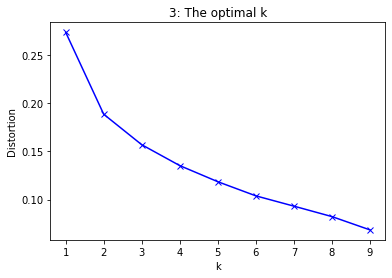

In [0]:
optimal_k(df3,3)

In [0]:
df3['prop'] = (df3['prop']-df3['prop'].mean())/(df3['prop'].max()-df3['prop'].min())
df3['angle'] = (df3['angle']-df3['angle'].mean())/(df3['angle'].max()-df3['angle'].min())

In [0]:
#너무 큰 비율->잘못된 detection이므로 제거
idx_nm = df3[df3['prop']>10].index
df3 = df3.drop(idx_nm)

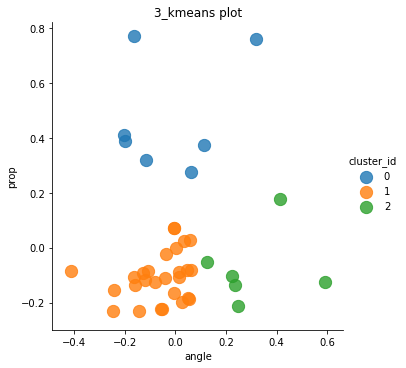

In [0]:
clustering(df3,3,3)

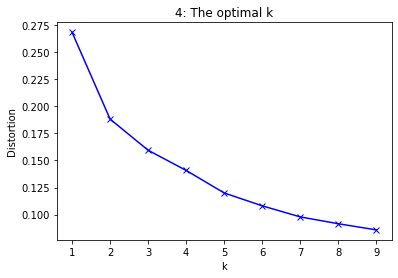

In [0]:
optimal_k(df4,4)

In [0]:
#너무 큰 비율->잘못된 detection이므로 제거
idx_nm = df4[df4['prop']>20].index
df4 = df4.drop(idx_nm)

In [0]:
df4['prop'] = (df4['prop']-df4['prop'].mean())/(df4['prop'].max()-df4['prop'].min())
df4['angle'] = (df4['angle']-df4['angle'].mean())/(df4['angle'].max()-df4['angle'].min())

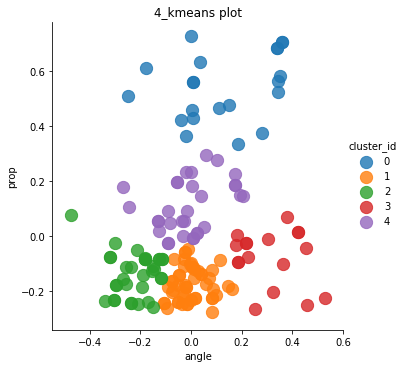

In [0]:
clustering(df4,4,5,False,test_df)

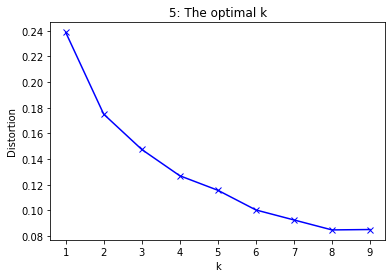

In [0]:
optimal_k(df5,5)

In [0]:
#너무 큰 비율->잘못된 detection이므로 제거
idx_nm = df5[df5['prop']>10].index
df5 = df5.drop(idx_nm)

In [0]:
df5['prop'] = (df5['prop']-df5['prop'].mean())/(df5['prop'].max()-df5['prop'].min())
df5['angle'] = (df5['angle']-df5['angle'].mean())/(df5['angle'].max()-df5['angle'].min())

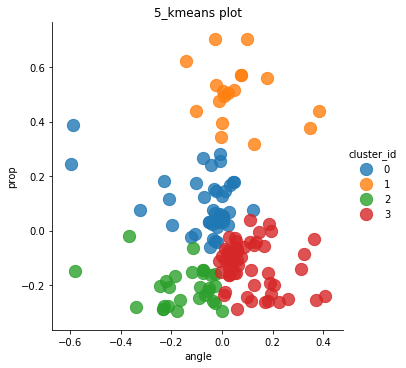

In [0]:
clustering(df5,5,4)

In [0]:
df1.to_csv('lottetower_df.csv', index=False)
df2.to_csv('merrygoround_df.csv', index=False)
df3.to_csv('namsantower_df.csv', index=False)
df4.to_csv('myeongdongcathedral_df.csv', index=False)
df5.to_csv('lottecastle_df.csv', index=False)

In [0]:
df1.drop[:,1]

TypeError: ignored